In [120]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [121]:
data = pd.read_csv("Italy-Squad-Possesion.csv",sep=';' ,encoding='latin-1')

In [122]:
dataitposs = data.copy()
dataitposs.head()

,Squad,NPL,Poss,90s,Touches,DefPen-Touch,Def3rd-Touch,Mid3rd-Touch,Att3rd-Touch,AttPen-Touch,...,GlsPer90,AstPer90,G-PKPer90,Ag-xGPer90,Ag-xAPer90,Ag-npxGPer90,Targ-AttRec,Rec-Suc,Rec%,ProgPassRec
0,Atalanta,23,54.0,8.0,5093,490,1617,2286,1472,252,...,1.62,1.00,1.37,1.56,0.83,1.27,3815,3304,86.6,324
1,Bologna,23,54.4,8.0,4851,509,1512,2450,1192,172,...,1.62,1.37,1.50,1.39,0.79,1.11,3794,3251,85.7,234
2,Cagliari,24,43.1,8.0,4233,605,1637,1875,936,148,...,1.37,1.00,1.13,1.58,1.16,1.39,3152,2612,82.9,194
3,Empoli,24,47.8,8.0,4509,581,1414,1988,1412,237,...,1.13,0.62,0.87,1.94,1.40,1.67,3411,2820,82.7,291
4,Fiorentina,24,56.3,8.0,5184,580,1811,2497,1222,173,...,1.25,0.75,0.87,1.59,1.13,1.29,4171,3696,88.6,274


In [123]:
dataitnew = dataitposs.drop(columns=["Targ-AttRec","Rec-Suc","Rec%","ProgPassRec","Poss","90s","Mis-CntBll","Dis-Carr","NPL"])

In [124]:
dataitnew.head()

,Squad,Touches,DefPen-Touch,Def3rd-Touch,Mid3rd-Touch,Att3rd-Touch,AttPen-Touch,LiveBall-Touch,Drib-Succ,Drib-Att,...,npxGPer90,Gls,Ast,G-PK,GlsPer90,AstPer90,G-PKPer90,Ag-xGPer90,Ag-xAPer90,Ag-npxGPer90
0,Atalanta,5093,490,1617,2286,1472,252,4699,47,101,...,1.76,13,8,11,1.62,1.00,1.37,1.56,0.83,1.27
1,Bologna,4851,509,1512,2450,1192,172,4464,70,123,...,1.10,13,11,12,1.62,1.37,1.50,1.39,0.79,1.11
2,Cagliari,4233,605,1637,1875,936,148,3838,48,88,...,0.94,11,8,9,1.37,1.00,1.13,1.58,1.16,1.39
3,Empoli,4509,581,1414,1988,1412,237,4076,62,120,...,1.05,9,5,7,1.13,0.62,0.87,1.94,1.40,1.67
4,Fiorentina,5184,580,1811,2497,1222,173,4817,40,93,...,0.78,10,6,7,1.25,0.75,0.87,1.59,1.13,1.29


In [125]:
dtw =dataitnew.sort_values(by=['Prog-Carr'],ascending=False)



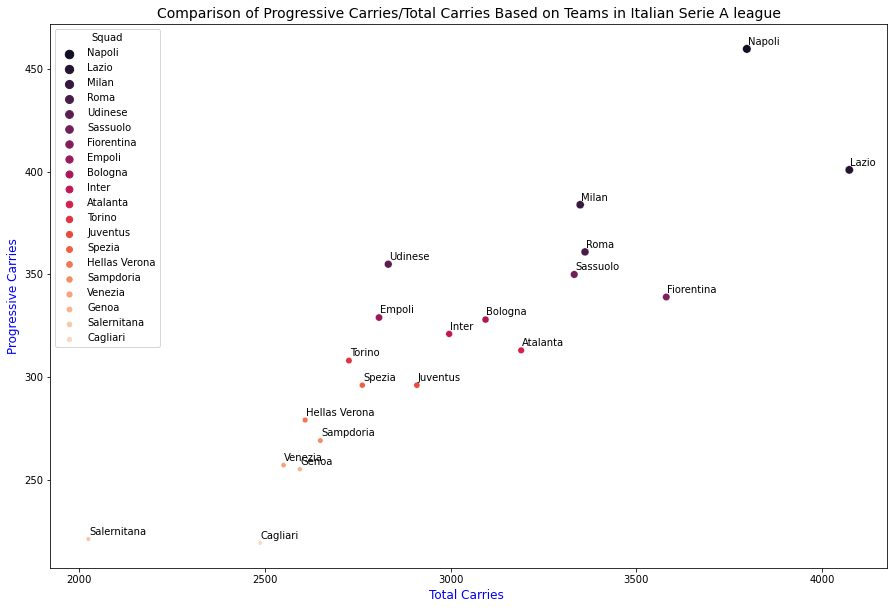

In [126]:
plt.figure(figsize=(15,10));
sns.scatterplot(data=dtw, x="Carries",y ="Prog-Carr",hue="Squad", size ="Squad",palette="rocket",alpha = 1,ci=95);
plt.title("Comparison of Progressive Carries/Total Carries Based on Teams in Italian Serie A league", fontsize = 14,color='black');
for i in range(dataitnew.shape[0]):
    plt.text(x=dataitnew["Carries"][i] + 2 , y=dataitnew["Prog-Carr"][i] + 2,s = dataitnew["Squad"][i],fontdict=dict(size=10))
plt.xlabel("Total Carries ",fontsize = 12 , color = 'blue');
plt.ylabel("Progressive Carries",fontsize = 12 , color = 'blue');
plt.show();

Text(0.5, 1.0, 'Goal Expectancy and Goals')

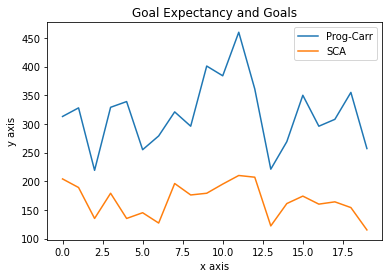

In [127]:
data1 = dataitnew.loc[:,["Prog-Carr","SCA"]]
data1.plot()
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Goal Expectancy and Goals')    

In [128]:
dtw.head()

,Squad,Touches,DefPen-Touch,Def3rd-Touch,Mid3rd-Touch,Att3rd-Touch,AttPen-Touch,LiveBall-Touch,Drib-Succ,Drib-Att,...,npxGPer90,Gls,Ast,G-PK,GlsPer90,AstPer90,G-PKPer90,Ag-xGPer90,Ag-xAPer90,Ag-npxGPer90
11,Napoli,5541,495,1581,2799,1511,219,5182,66,115,...,1.44,19,12,17,2.37,1.50,2.12,0.61,0.47,0.61
9,Lazio,5728,546,1759,2912,1415,176,5381,70,111,...,1.27,18,13,15,2.25,1.62,1.87,1.52,1.06,1.23
10,Milan,5023,489,1542,2490,1334,229,4677,91,165,...,1.67,17,11,15,2.12,1.37,1.87,0.98,0.55,0.79
12,Roma,5100,465,1533,2542,1345,234,4732,67,130,...,1.63,15,13,14,1.87,1.62,1.75,1.10,0.83,1.10
18,Udinese,4370,541,1539,2043,1099,167,4004,74,142,...,1.28,10,6,9,1.25,0.75,1.13,1.41,0.92,1.25


<Figure size 1080x720 with 0 Axes>

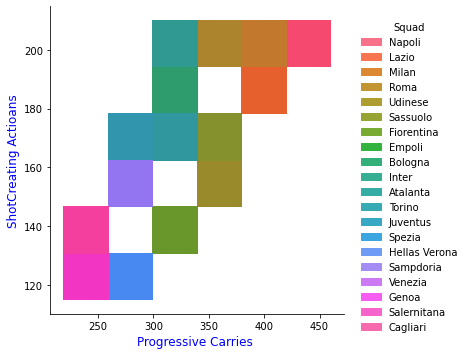

In [129]:
plt.figure(figsize=(15,10));
sns.displot(data=dtw, x="Prog-Carr",y ="SCA", hue ="Squad");
plt.xlabel("Progressive Carries ",fontsize = 12 , color = 'blue');
plt.ylabel("ShotCreating Actioans",fontsize = 12 , color = 'blue');
plt.show();


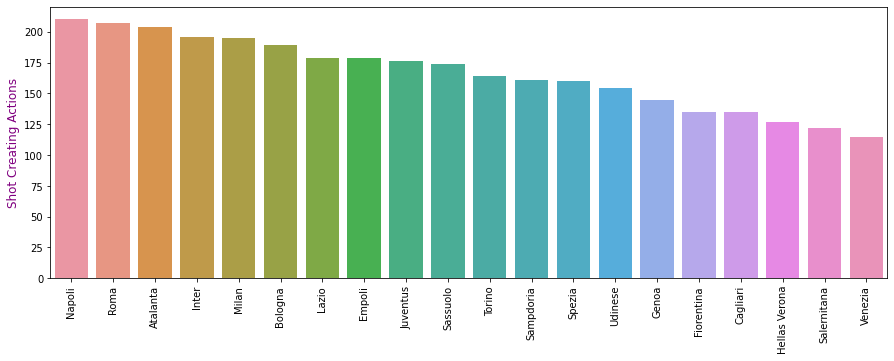

In [130]:
plt.figure(figsize=(15,5));
dataitsca =dataitnew.sort_values(by=['SCA'],ascending=False)
bar_ap = sns.barplot(data =dataitsca, x='Squad', y='SCA',linewidth=0.2)
bar_ap.set_xticklabels(bar_ap.get_xticklabels(), rotation=90)
plt.ylabel("Shot Creating Actions",fontsize = 12,color="purple" );
plt.xlabel("",fontsize = 12 , color = 'green');
plt.show()

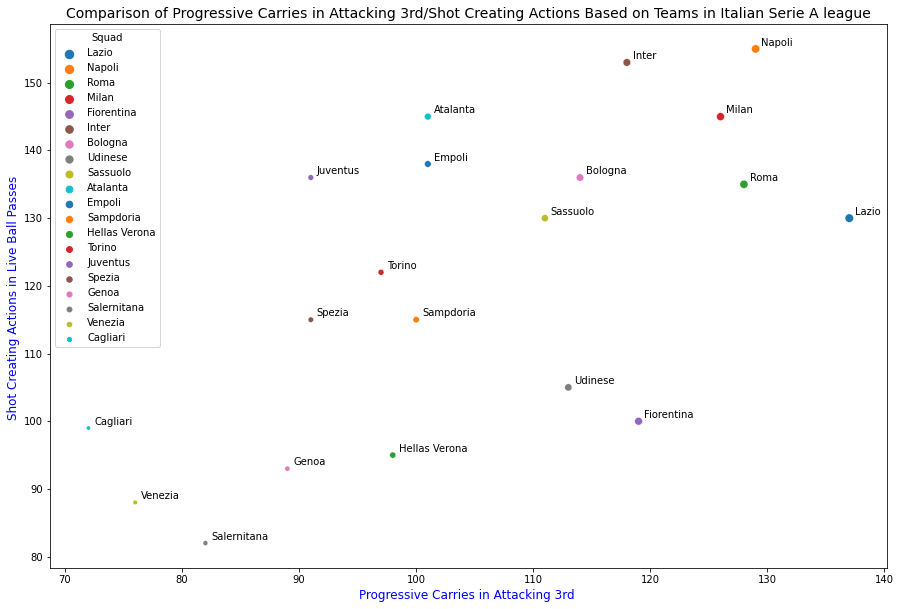

In [131]:
plt.figure(figsize=(15,10));
dataitattcarr =dataitnew.sort_values(by=['1/3'],ascending=False)
sns.scatterplot(data=dataitattcarr, x="1/3",y ="SCA-PassLive",hue="Squad", size ="Squad",palette="tab10",alpha = 1,ci=95);
for i in range(dataitattcarr.shape[0]):
    plt.text(x=dataitattcarr["1/3"][i] + 0.5 , y=dataitattcarr["SCA-PassLive"][i] + 0.5,s = dataitattcarr["Squad"][i],fontdict=dict(size=10))
plt.title("Comparison of Progressive Carries in Attacking 3rd/Shot Creating Actions Based on Teams in Italian Serie A league", fontsize = 14,color='black');
plt.xlabel("Progressive Carries in Attacking 3rd ",fontsize = 12 , color = 'blue');
plt.ylabel("Shot Creating Actions in Live Ball Passes ",fontsize = 12 , color = 'blue');
plt.show();

In [1]:
plt.figure(figsize=(15,10));
dataitgls =dataitnew.sort_values(by=['GlsPer90'],ascending=False)
ax = sns.barplot(data =dataitgls, x='GlsPer90', y='Squad',linewidth=0.1,orient = 'h',palette="rocket")
bar_ap.set_xticklabels(bar_ap.get_xticklabels(), rotation=90)
plt.title("Goals in 90minutes Based on Teams in Italian Serie A league", fontsize = 14,color='black');
plt.ylabel("",fontsize = 12,color="red" );
plt.xlabel("Goals per 90min ",fontsize = 12 , color = 'green');
plt.show()

NameError: name 'plt' is not defined

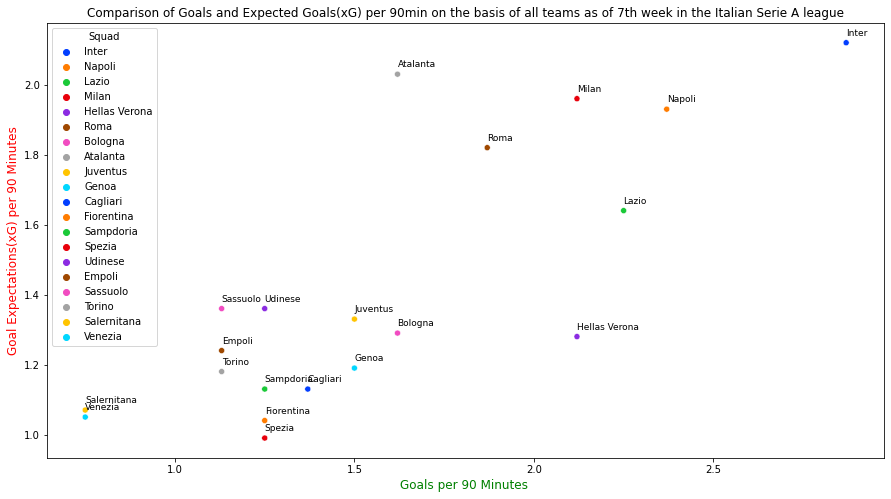

In [158]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=dataitgls, x="GlsPer90",y ="xGPer90",hue="Squad",palette = "bright",alpha = 1)
for i in range(dataitgls.shape[0]):
    plt.text(x=dataitgls["GlsPer90"][i] , y=dataitgls["xGPer90"][i]+0.02,s = dataitgls["Squad"][i],fontdict=dict(size=9))
plt.title("Comparison of Goals and Expected Goals(xG) per 90min on the basis of all teams as of 7th week in the Italian Serie A league", fontsize = 12,color='black');
plt.xlabel("Goals per 90 Minutes ",fontsize = 12 , color = 'green');
plt.ylabel("Goal Expectations(xG) per 90 Minutes",fontsize = 12 , color = 'red');
plt.show()

In [161]:
dataitgls.head()

,Squad,Touches,DefPen-Touch,Def3rd-Touch,Mid3rd-Touch,Att3rd-Touch,AttPen-Touch,LiveBall-Touch,Drib-Succ,Drib-Att,...,npxGPer90,Gls,Ast,G-PK,GlsPer90,AstPer90,G-PKPer90,Ag-xGPer90,Ag-xAPer90,Ag-npxGPer90
7,Inter,4707,585,1644,2192,1192,230,4368,52,99,...,1.84,23,17,21,2.87,2.12,2.62,1.40,0.81,1.22
11,Napoli,5541,495,1581,2799,1511,219,5182,66,115,...,1.44,19,12,17,2.37,1.50,2.12,0.61,0.47,0.61
9,Lazio,5728,546,1759,2912,1415,176,5381,70,111,...,1.27,18,13,15,2.25,1.62,1.87,1.52,1.06,1.23
10,Milan,5023,489,1542,2490,1334,229,4677,91,165,...,1.67,17,11,15,2.12,1.37,1.87,0.98,0.55,0.79
6,Hellas Verona,4328,526,1385,2035,1146,173,3974,57,112,...,1.00,17,12,14,2.12,1.50,1.75,1.56,0.96,1.37


In [172]:
datajuv= data[dataitgls['Squad'] == "Juventus"]
dataint= data[dataitgls['Squad'] == "Inter"]
datanap= data[dataitgls['Squad'] == "Napoli"]
datalaz= data[dataitgls['Squad'] == "Lazio"]
datamil= data[dataitgls['Squad'] == "Milan"]
datarom= data[dataitgls['Squad'] == "Roma"]
datata= data[dataitgls['Squad'] == "Atalanta"]

<ipython-input-172-2639af3af3f7>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  datajuv= data[dataitgls['Squad'] == "Juventus"]
<ipython-input-172-2639af3af3f7>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataint= data[dataitgls['Squad'] == "Inter"]
<ipython-input-172-2639af3af3f7>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  datanap= data[dataitgls['Squad'] == "Napoli"]
<ipython-input-172-2639af3af3f7>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  datalaz= data[dataitgls['Squad'] == "Lazio"]
<ipython-input-172-2639af3af3f7>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  datamil= data[dataitgls['Squad'] == "Milan"]
<ipython-input-172-2639af3af3f7>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  datarom= data[dataitgls['Squad'] == "Roma"]
<ipython-input-172-2639af3af3f7>:7: UserWar

In [216]:
databigteams=pd.concat([datajuv,dataint,datanap,datalaz,datamil,datarom,datata])


In [235]:
databigteams_new = databigteams.set_axis(['0', '1', '2','3','4','5','6'], axis=0)

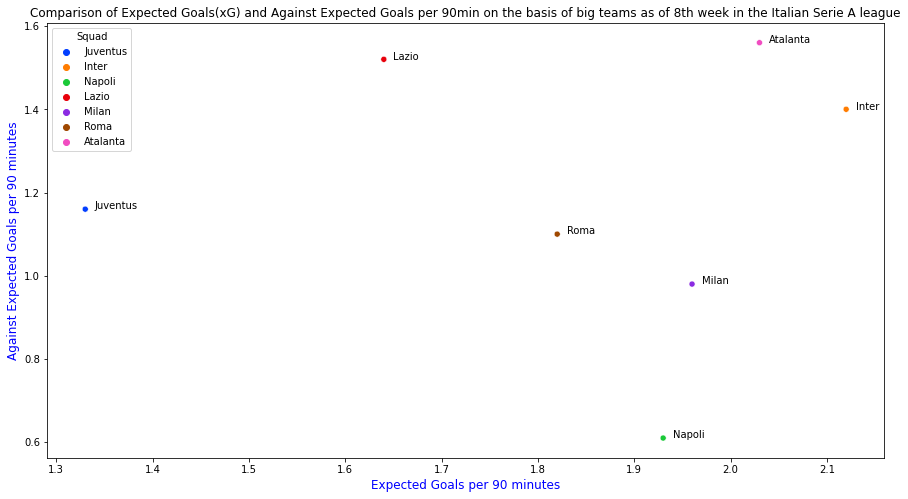

In [248]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=databigteams_new, x="xGPer90",y ="Ag-xGPer90",hue="Squad",palette = "bright",alpha = 1)
for i in range(databigteams_new.shape[0]):
    plt.text(x=databigteams_new["xGPer90"][i]+0.01 , y=databigteams_new["Ag-xGPer90"][i],s = databigteams_new["Squad"][i],fontdict=dict(size=10))
plt.title("Comparison of Expected Goals(xG) and Against Expected Goals per 90min on the basis of big teams as of 8th week in the Italian Serie A league", fontsize = 12,color='black');
plt.xlabel("Expected Goals per 90 minutes",fontsize = 12 , color = 'blue');
plt.ylabel("Against Expected Goals per 90 minutes",fontsize = 12 , color = 'blue');
plt.show()
